TypeError: can't multiply sequence by non-int of type 'list'

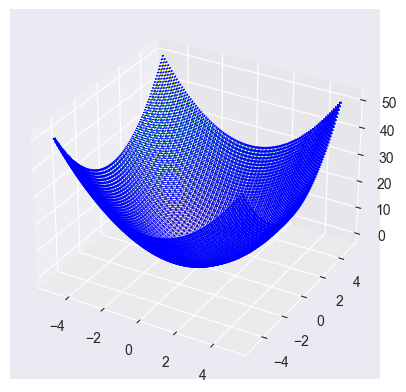

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Функция, для которой мы ищем экстремум
def f(x, y):
    return x**2 + y**2

# Создание сетки точек для графика
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Построение поверхности
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# Выбор точки для анализа
x0, y0 = 1, 1
ax.scatter(x0, y0, f(x0, y0), color='red', s=100, label='Точка анализа')

# Необходимое условие экстремума: Градиент функции равен нулю
gradient = np.gradient(z)
ax.quiver(x, y, z, -gradient[0], -gradient[1], np.zeros_like(z), length=0.1, color='blue', label='Градиент')

# Достаточное условие экстремума: Определитель Гессиана положителен (вторая производная)
H_xx, H_yy = np.gradient(gradient[0]), np.gradient(gradient[1])
H_xy = np.gradient(gradient[1])[0]
det_hessian = H_xx * H_yy - H_xy**2
extremum_condition = np.where(det_hessian > 0, 1, 0)
extremum_condition = np.ma.masked_where(extremum_condition == 0, extremum_condition)
ax.quiver(x, y, z, np.zeros_like(z), np.zeros_like(z), extremum_condition, length=0.1, color='green', label='Достаточное условие')

# Настройка графика
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.legend()

plt.show()
